In [21]:
import os
import matplotlib.pyplot as plt
from read_write_mrc import read_mrc, write_mrc
from matplotlib.pyplot import imread
import numpy as np
import cv2

In [22]:
def padding(img):
    
    if (img.shape[1]%2 != 0):
        pad_img = np.pad(img, pad_width= (  (int((500-img.shape[0])/2),int((500-img.shape[0])/2+1))   ,  ( int((700-img.shape[1])/2), int((700-img.shape[1])/2+1)),  ( int((500-img.shape[2])/2), int((500-img.shape[2])/2+1)  ))) 
    
    if (img.shape[1]%2 ==0):
        pad_img = np.pad(img, pad_width= (  (int((500-img.shape[0])/2),int((500-img.shape[0])/2+1))   ,  ( int((700-img.shape[1])/2), int((700-img.shape[1])/2)),  ( int((500-img.shape[2])/2), int((500-img.shape[2])/2+1)  )))
    
    return pad_img 

In [28]:
img = read_mrc("data/mrc/Stevens_pancreatic_INS_1E_5_817_5_pre_rec.mrc")
labels = read_mrc("data/masks/Stevens_pancreatic_INS_1E_5_817_5_pre_rec_labels.mrc")
print("before padding:")
print("img.shape : ", img.shape)
print("labels.shape : ",labels.shape)

img = padding(img)
labels = padding(labels)
print("\nafter padding")
print("img.shape : ",img.shape)
print("labels.shape : ",labels.shape)

before padding:
img.shape :  (475, 494, 475)
labels.shape :  (475, 494, 475)

after padding
img.shape :  (500, 700, 500)
labels.shape :  (500, 700, 500)


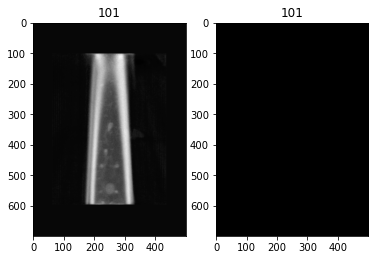

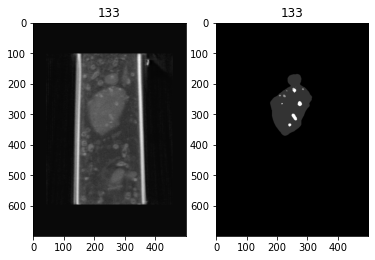

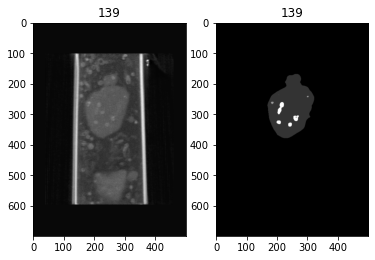

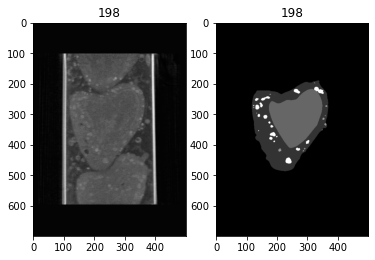

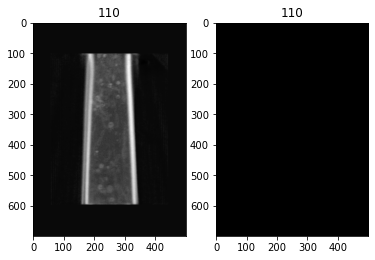

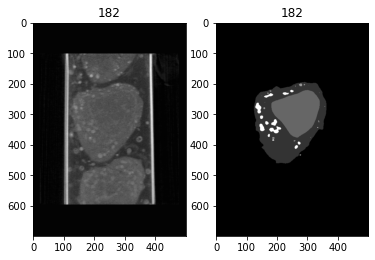

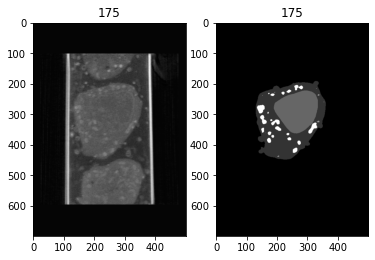

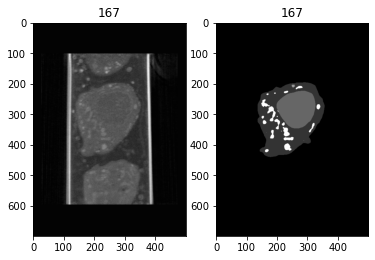

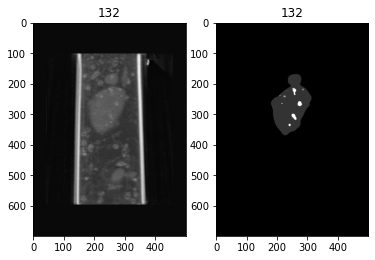

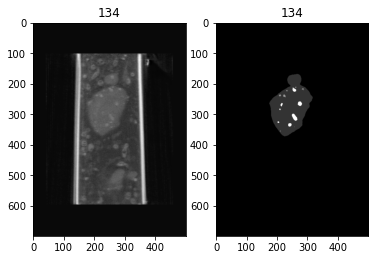

In [29]:
rand_i = np.random.randint(100,200,10)

for i in rand_i:
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(img[i],cmap = 'gray')
    plt.title(label = i)
    plt.subplot(1,2,2)
    plt.imshow(labels[i], cmap= 'gray')
    plt.title(label = i)

In [30]:
print(img.shape)
print(labels.shape)

(500, 700, 500)
(500, 700, 500)


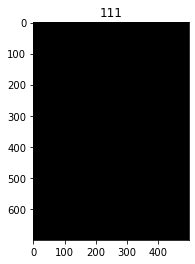

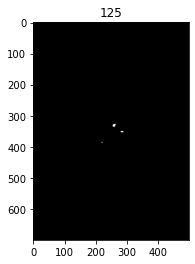

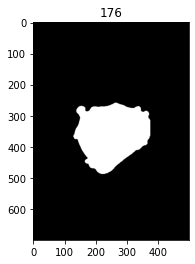

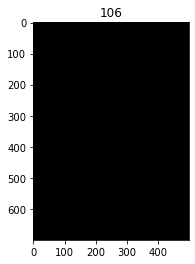

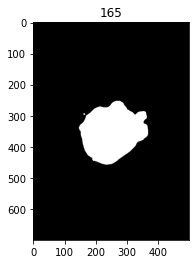

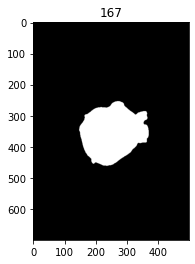

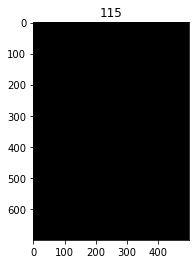

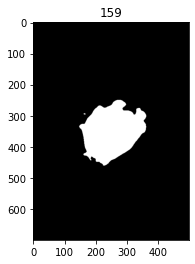

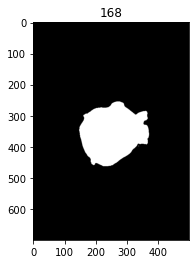

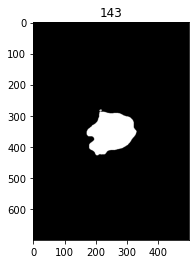

In [25]:
_, mask = cv2.threshold(labels, thresh = 0, maxval = 255, type = cv2.THRESH_BINARY)

for i in rand_i:
    plt.figure()
    plt.imshow(mask[i], cmap='gray')
    plt.title(label = i)

In [32]:
masked = cv2.bitwise_and(img.astype('uint8'), img.astype('uint8') , mask = mask.astype('uint8'))

for i in rand_i:
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(img,cmap = 'gray')
    plt.title(label = i)
    plt.subplot(1,3,2)
    plt.imshow(labels[i], cmap = 'gray')
    plt.titel()
    plt.subplot(1,3,3)
    plt.imshow(masked[i], cmap = 'gray')

error: OpenCV(4.5.1) ../modules/core/src/arithm.cpp:250: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'


In [33]:
masked = cv2.bitwise_and(img, img , mask = mask.astype('uint8'))

for i in rand_i:
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(img,cmap = 'gray')
    plt.title(label = i)
    plt.subplot(1,3,2)
    plt.imshow(labels[i], cmap = 'gray')
    plt.titel()
    plt.subplot(1,3,3)
    plt.imshow(masked[i], cmap = 'gray')

error: OpenCV(4.5.1) ../modules/core/src/arithm.cpp:250: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'
